In [28]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.11.0


In [29]:
import os 
image_path = './2.Validation/1.원천데이터/damage/'
img_list = os.listdir(image_path)

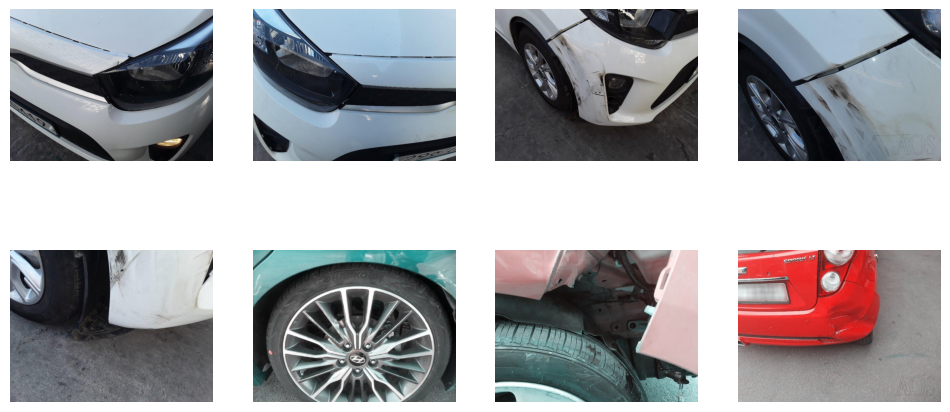

In [4]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows, ncols = 4, 4
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*3, nrows*3)

pic_index+=8

next_car_pix = [os.path.join(image_path, fname)for fname in img_list[ pic_index-8:pic_index]]

# next_dog_pix = [os.path.join(train_dogs_dir, fname)for fname in train_dogs_fnames[ pic_index-8:pic_index]]

for i, img_path in enumerate(next_car_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [53]:
image_path
img_list[0]

'0506233_sc-202337.jpg'

In [60]:
img = Image.open(image_path+img_list[0])
img_array = np.array(img, dtype='uint8')
tf.image.resize(img_array, (28, 28)).shape

TensorShape([28, 28, 3])

In [75]:
# 이미지 데이터 불러오고 사이즈 변환
#img_list image_path
from PIL import Image

for i in range(10):
    img = Image.open(image_path+img_list[i])
    print(image_path+img_list[i])
    img_resize = img.resize((256, 256))
    img_convert = img_resize.convert('RGB')
    img_convert.save('./test/'+img_list[i])

# for f in files:
#     title, ext = os.path.splitext(f)
#     if ext in ['.jpg']:
#         img = Image.open(f)
#         img_resize = img.resize((256, 256))
#         img_convert = img_resize.convert('RGB')
#         img_convert.save(title+ext)
    
# print(img_resize)

./2.Validation/1.원천데이터/damage/0506233_sc-202337.jpg
./2.Validation/1.원천데이터/damage/0506234_sc-202337.jpg
./2.Validation/1.원천데이터/damage/0506235_sc-202337.jpg
./2.Validation/1.원천데이터/damage/0506236_sc-202337.jpg
./2.Validation/1.원천데이터/damage/0506237_sc-202337.jpg
./2.Validation/1.원천데이터/damage/0506238_as-3203576.jpg
./2.Validation/1.원천데이터/damage/0506239_as-3483186.jpg
./2.Validation/1.원천데이터/damage/0506240_as-7962812.jpg
./2.Validation/1.원천데이터/damage/0506241_sc-190131.jpg
./2.Validation/1.원천데이터/damage/0506245_sc-198049.jpg


In [6]:
# class 가져오기
# import pandas as pd
# df_labeling = pd.read_csv('../code_file/code/part_labeling.csv')
# df_labeling.columns

In [80]:
img2 = Image.open('./test/'+img_list[0])
np.ndarray(img2)

TypeError: expected a sequence of integers or a single integer, got '<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256 at 0x23B754FB580>'

In [12]:
class_names = ['Front bumper', 'Trunk lid', 'Bonnet', 'Head lights(L)',
       'Rear bumper', 'Rear door(R)', 'Front door(R)', 'Rear fender(R)',
       'Rear fender(L)', 'Rear lamp(R)', 'Side mirror(R)', 'A pillar(L)',
       'Rear door(L)', 'Front door(L)', 'Front fender(R)', 'Front Wheel(L)',
       'Front Wheel(R)', 'Rear lamp(L)', 'Front fender(L)', 'Rocker panel(R)',
       'Head lights(R)', 'Rear Wheel(R)', 'Rear Wheel(L)', 'C pillar(L)',
       'Side mirror(L)', 'Rocker panel(L)', 'Windshield', 'C pillar(R)',
       'Rear windshield', 'Undercarriage', 'Roof', 'A pillar(R)', 'B pillar(R)']

In [ ]:
'Front bumper'
'Rear bumper'


In [90]:
len(class_names)

33

In [100]:
len(dmg_json)

50445

In [113]:
import json
import re
json_path = './2.Validation/2.라벨링데이터/damage/'
dmg_json = os.listdir(json_path)

label_test = []
for i in range(100):
    with open(json_path+dmg_json[i], 'r') as f:
        json_data = json.load(f)
        json_data = json_data['annotations'][0]['repair']
        json_data = re.sub(r'[^\w\s]', '', str(label_test[0]).split(':')[0])
        label_test.append(json_data)
        # label_test.append(json_data['annotations'][0]['repair'][0].split(":")[0])

# print(label_test)
# ## front bumer를 가져올 수 있다 
# class_names[0]==json_data['annotations'][0]['repair'][0].split(":")[0]

IndexError: list index out of range

In [114]:
json_data = re.sub(r'[^\w\s]', '', str(label_test[0]).split(':')[0])
label_test.append(json_data)

IndexError: list index out of range

In [17]:
print(json_data['annotations'][0]['repair'][0].split(":")[0])
print(json_data['annotations'][1]['repair'][0].split(":")[0])

Front bumper
Front bumper


In [112]:
import re
re.sub(r'[^\w\s]', '', str(label_test[0]).split(':')[0])

'Front bumper'

In [102]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

encoder = LabelEncoder()

encoder.fit(class_names)

for label in np.unique(label_test):
    if label not in encoder.classes_:
        encoder.classes_ = np.append(encoder.classes_,label)
    labeled_test = encoder.transform(label_test)

labeled_test

array([11])

In [26]:
print(encoder.inverse_transform(labeled_test))

['Front bumper' 'Front bumper' 'Front bumper' 'Front bumper'
 'Front bumper' 'Front bumper' 'Front bumper' 'Rear bumper' 'Front bumper'
 'Rear door(R)']
